In [41]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

## Download and load the breast cancer dataset from Local 


In [42]:
data = pd.read_csv("C:\\Users\\Ravishankar\\Downloads\\cancer.csv")

## Check for missing values

In [44]:
print(data.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [45]:
label_obj= LabelEncoder()
data["diagnosis_Updated"]=label_obj.fit_transform(data["diagnosis"])
data.drop('diagnosis',axis=1,inplace=True)

## Separate features (X) and target variable (y)

In [46]:
X = data.drop(["diagnosis_Updated",'Unnamed: 32'], axis=1)
y = data["diagnosis_Updated"]

## Encode categorical variables (replace with chosen encoding method)


In [47]:
X = pd.get_dummies(X)  

## Feature scaling

In [48]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Split data for training and testing


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Define and train the Random Forest model


In [50]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Make predictions on the testing set


In [51]:
y_pred = model.predict(X_test)

### Evaluate model performance

In [52]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)  # Assuming 'M' is positive class (label 1)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("AUC-ROC:", auc)

Accuracy: 0.9649122807017544
Precision: 0.975609756097561
Recall: 0.9302325581395349
AUC-ROC: 0.9580740255486406


## Linear SVM with default parameters


In [53]:
from sklearn.svm import SVC
model = SVC(C=0.1,kernel='linear',gamma='auto')
model.fit(X_train, y_train)


SVC(C=0.1, gamma='auto', kernel='linear')

In [54]:
# Make predictions
y_pred = model.predict(X_test)

In [55]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)  # Assuming 'M' is positive class
recall = recall_score(y_test, y_pred)
specificity = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("specificity",specificity)
print("AUC-ROC:", auc)

Accuracy: 0.9824561403508771
Precision: 1.0
Recall: 0.9534883720930233
specificity 0.9534883720930233
AUC-ROC: 0.9767441860465116


## Print classification report for precesion, recall and f1-score for each classes


In [56]:
from sklearn.metrics import classification_report

In [57]:
cls=classification_report(y_test,y_pred)

In [58]:
print(cls)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## Hyper Parameter Tuning

In [ ]:

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}
grid_search = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Re-train the model with best parameters
best_model.fit(X_train_scaled, y_train)

# Predictions on test set using best model
y_pred_best = best_model.predict(X_test_scaled)

# Model evaluation with best model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, best_model.predict_proba(X_test_scaled)[:,1])
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

print("Best Model - Accuracy:", accuracy_best)
print("Best Model - Precision:", precision_best)
print("Best Model - Recall:", recall_best)
print("Best Model - ROC AUC:", roc_auc_best)
print("Best Model - Confusion Matrix:\n", conf_matrix_best)


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

## Pairplot

In [60]:
data = data.drop(columns=['Unnamed: 32'])

In [22]:
df = data.drop('diagnosis_Updated',axis=1)

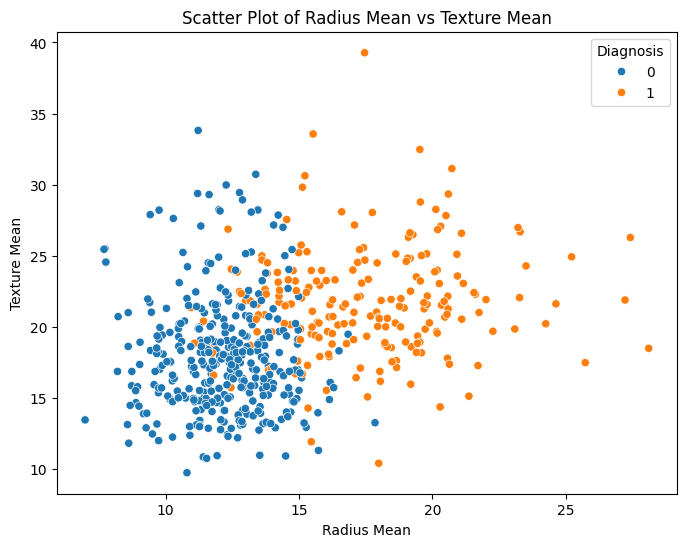

In [64]:


# Scatter plot of 'radius_mean' vs 'texture_mean'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='radius_mean', y='texture_mean', data=data, hue='diagnosis_Updated')
plt.title("Scatter Plot of Radius Mean vs Texture Mean")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.legend(title='Diagnosis')
plt.show()



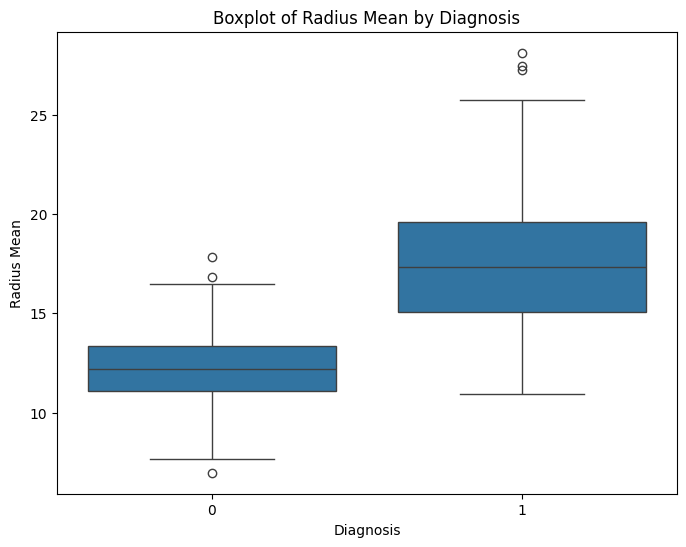

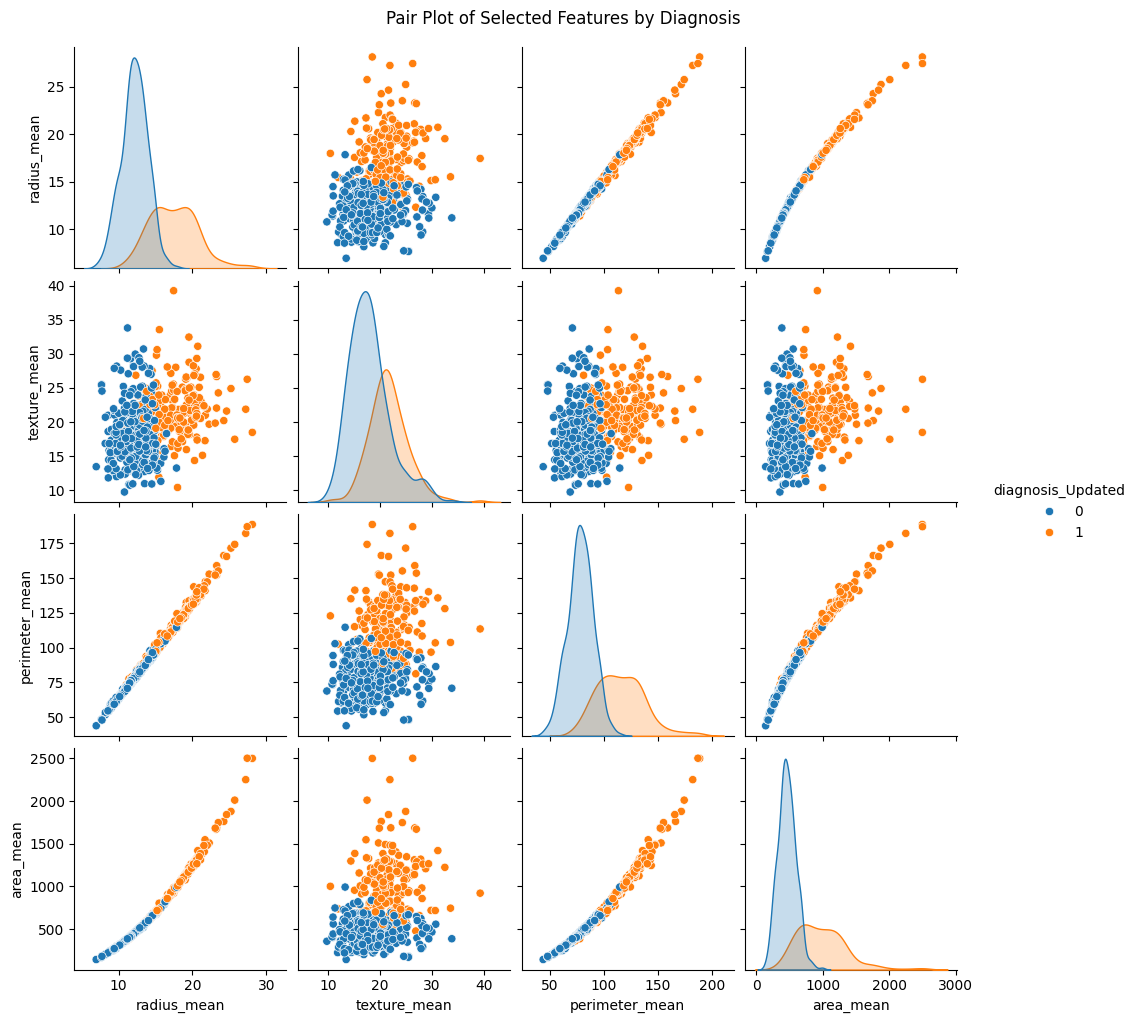

In [70]:

# Box plot of 'radius_mean' by 'diagnosis'
plt.figure(figsize=(8, 6))
sns.boxplot(x='diagnosis_Updated', y='radius_mean', data=data)
plt.title("Boxplot of Radius Mean by Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Radius Mean")
plt.show()

# Pair plot of a subset of columns
selected_columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'diagnosis_Updated']
sns.pairplot(data[selected_columns], hue='diagnosis_Updated', diag_kind='kde')
plt.suptitle("Pair Plot of Selected Features by Diagnosis", y=1.02)
plt.show()

## Boxplot


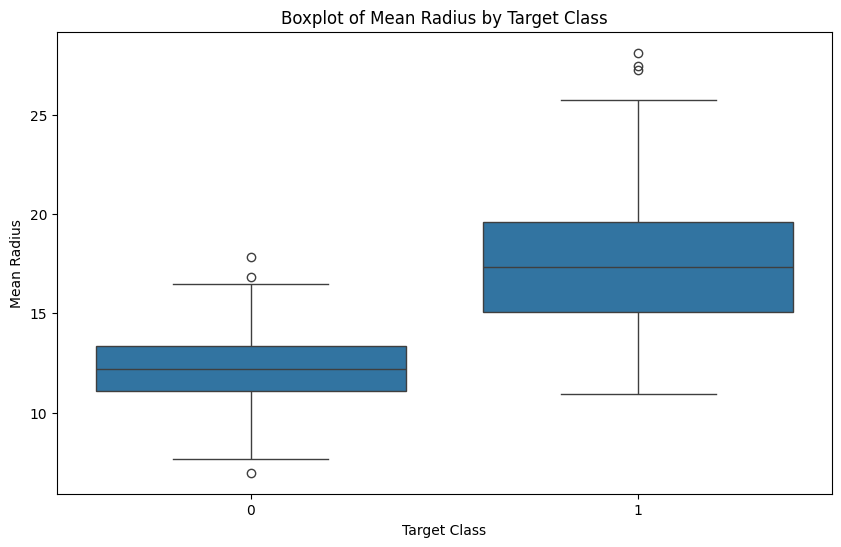

In [74]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diagnosis_Updated', y='radius_mean', data=data)
plt.title("Boxplot of Mean Radius by Target Class")
plt.xlabel("Target Class")
plt.ylabel("Mean Radius")
plt.show()

## Correlation heatmap

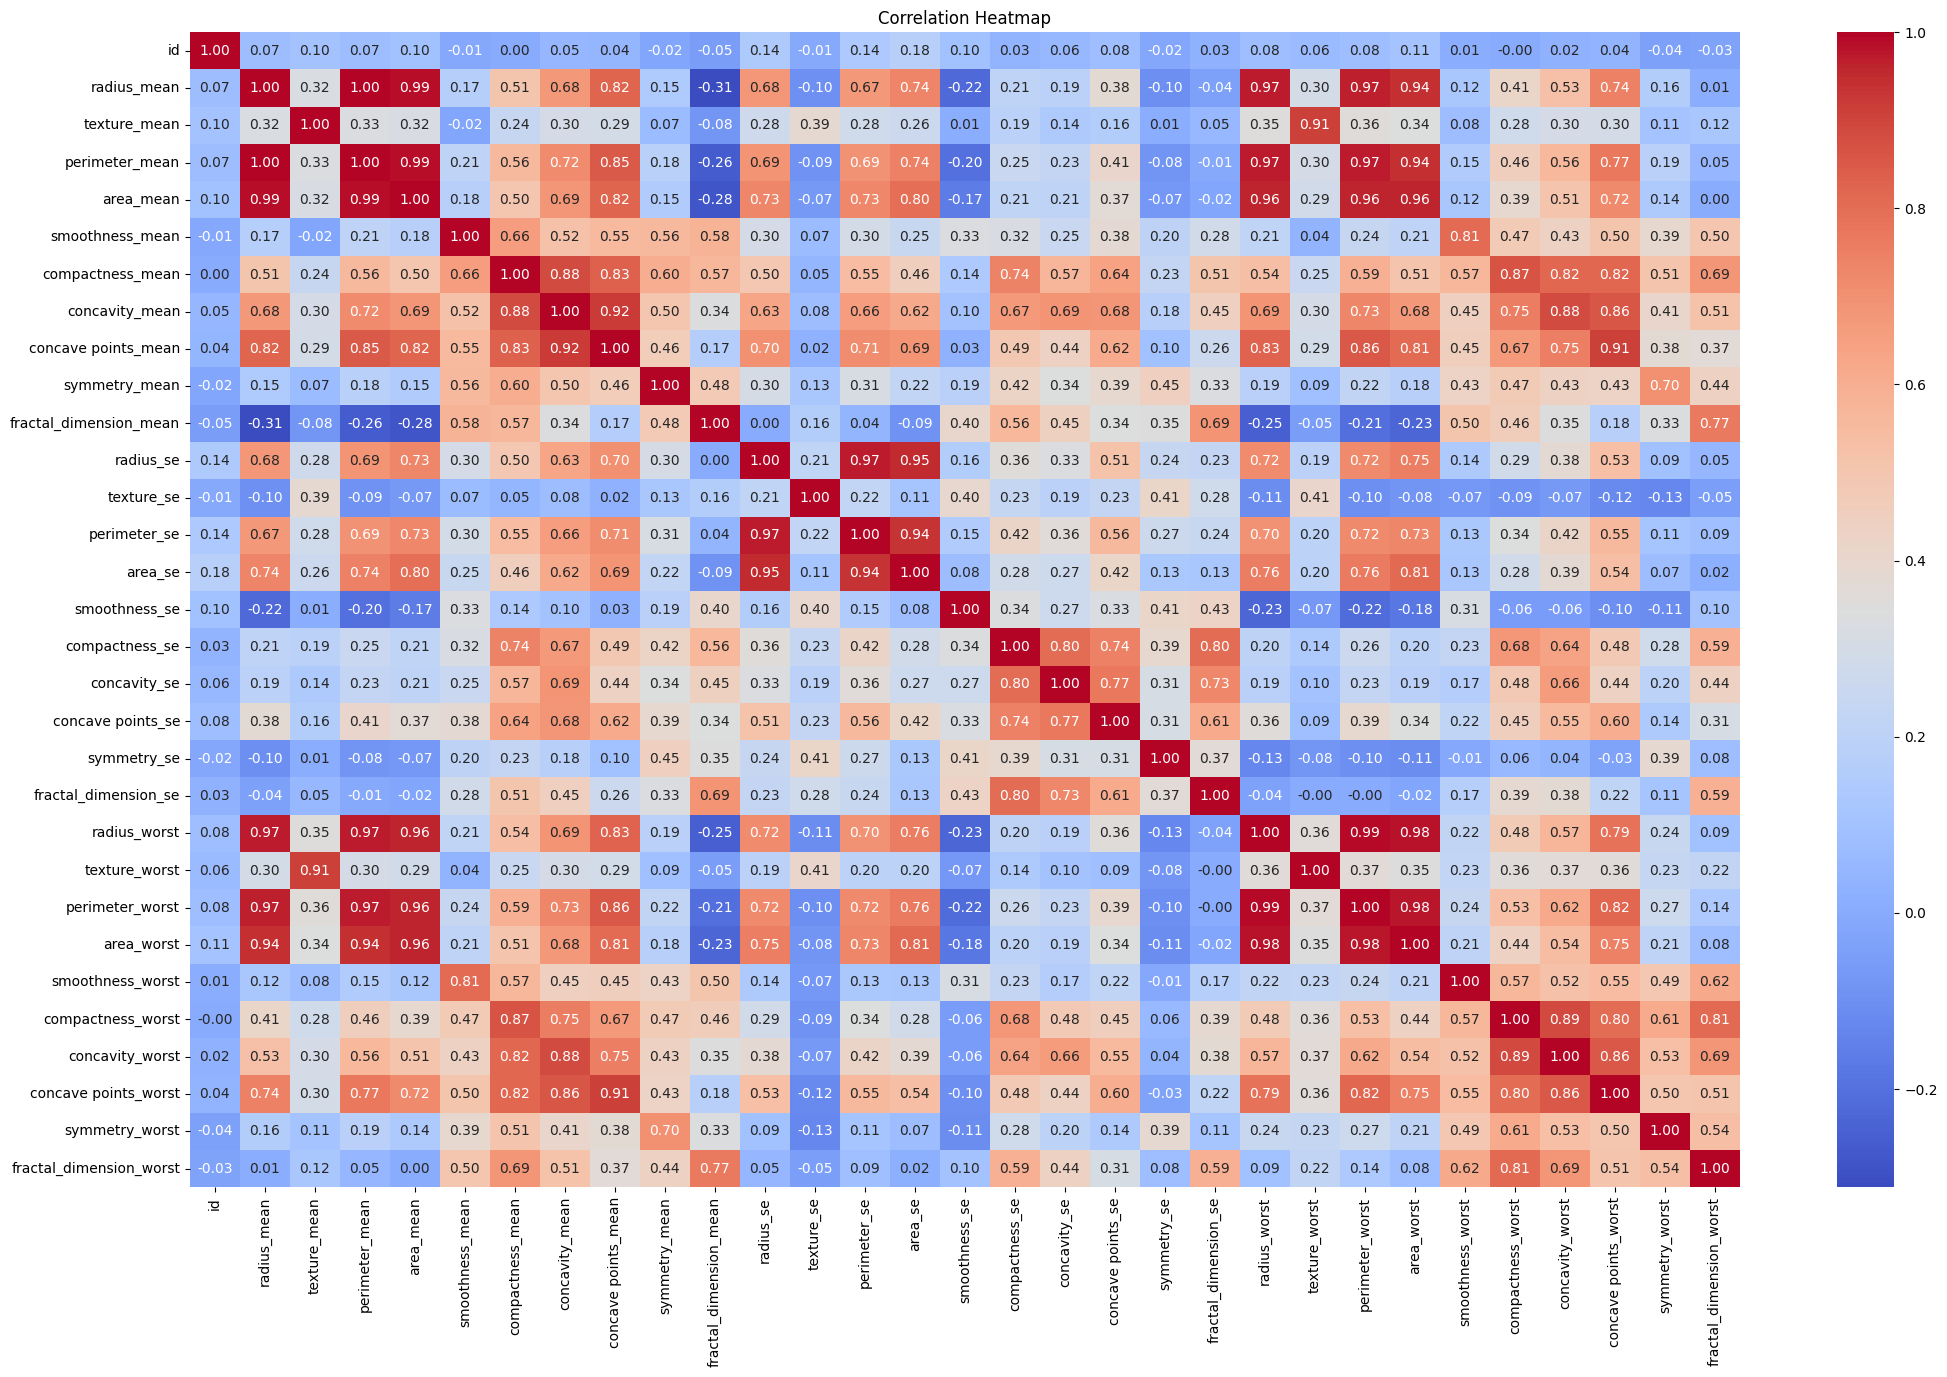

In [75]:

plt.figure(figsize=(25, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

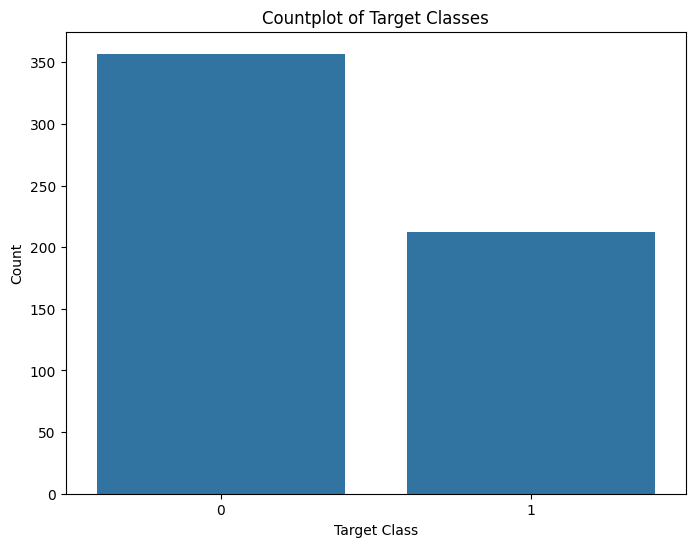

In [78]:

# Countplot of target classes
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis_Updated', data=data)
plt.title("Countplot of Target Classes")
plt.xlabel("Target Class")
plt.ylabel("Count")
plt.show()

Text(0, 0.5, 'Mean Radius')

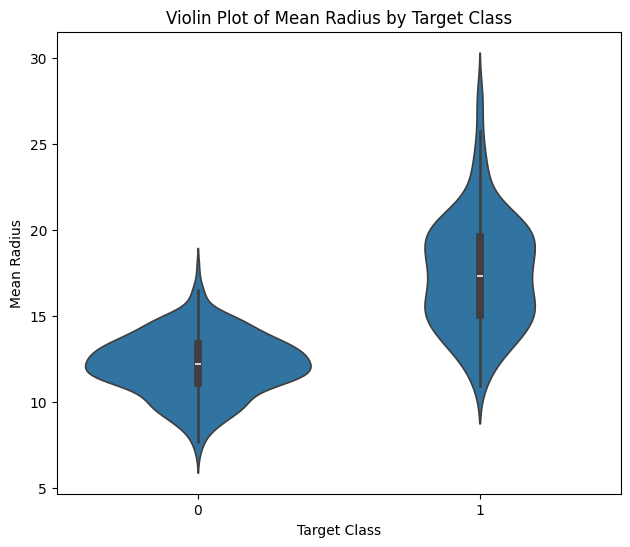

In [80]:
# Set the figure size
plt.figure(figsize=(16, 6))

# Create a violin plot
plt.subplot(1, 2, 1)
sns.violinplot(x='diagnosis_Updated', y='radius_mean', data=data)
plt.title("Violin Plot of Mean Radius by Target Class")
plt.xlabel("Target Class")
plt.ylabel("Mean Radius")


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns 